
## Importing Libraries


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

## Importing dataset

In [ ]:
file_path = 'Cleaned Sheet.xlsx'

data = pd.read_excel(file_path)

In [67]:
data.head()

Name  COMPLETE  Stroke volume  age  gender  NIHSS  SHT   DM  \
0    Prakash Deshmukh        0.0        22.6272   72       1   22.0  1.0  1.0   
1    Madhukar Khangute       0.0       131.5980   82       1   22.0  1.0  1.0   
2        Nilesh Dhande       0.0        73.4947   46       1    3.0  1.0  2.0   
3  Bhalchandra govande       0.0       194.1680   83       1    NaN  1.0  1.0   
4  Balasaheb Washilkar       1.0        53.8945   50       1   24.0  1.0  2.0   

   Alcohol  tobacco  ...  Lt Supraclinoid ICA  Lt Proximal M1 MCA  \
0      2.0      2.0  ...                  0.0                 0.0   
1      2.0      2.0  ...                  2.0                 0.0   
2      2.0      2.0  ...                  0.0                 2.0   
3      2.0      2.0  ...                  0.0                 0.0   
4      2.0      1.0  ...                  0.0                 0.0   

   Lt Distal M1 MCA  Lt M2MCA rear  Lt M2 MCA forward  Lt A1 ACA  \
0               0.0            1.0                1.0        1.0   
1               0.0            0.0                0.0        0.0   
2               2.0            1.0                1.0        1.0   
3               0.0            0.0                0.0        0.0   
4               0.0            0.0                0.0        1.0   

   clot burden score  Lt ICA origin  Rt ICA origin            CCA  
0                  3              0              1              0  
1                  3              1              1              0  
2                  7              1              1              0  
3                  7              1              1  Rt CCA plaque  
4                  1              0              1              0  

[5 rows x 61 columns]

In [68]:
data.shape

(203, 61)

In [69]:
data.isna().sum()

Name                  0
COMPLETE             13
Stroke volume         0
age                   0
gender                0
                     ..
Lt A1 ACA             9
clot burden score     0
Lt ICA origin         0
Rt ICA origin         0
CCA                   6
Length: 61, dtype: int64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          203 non-null    object 
 1   COMPLETE                      190 non-null    float64
 2   Stroke volume                 203 non-null    float64
 3   age                           203 non-null    int64  
 4   gender                        203 non-null    int64  
 5   NIHSS                         181 non-null    float64
 6   SHT                           200 non-null    float64
 7   DM                            199 non-null    float64
 8   Alcohol                       199 non-null    float64
 9   tobacco                       199 non-null    float64
 10  smoking                       199 non-null    float64
 11  dyslipidaemia                 199 non-null    float64
 12  atrial fibrillation           199 non-null    float64
 13  IHD  

In [71]:
data.nunique()

Name                 195
COMPLETE               2
Stroke volume        194
age                   59
gender                 2
                    ... 
Lt A1 ACA              2
clot burden score     10
Lt ICA origin          2
Rt ICA origin          2
CCA                   18
Length: 61, dtype: int64

### Selecting features manually

In [72]:
data.columns

Index(['Name', 'COMPLETE', 'Stroke volume', 'age', 'gender', 'NIHSS', 'SHT',
       'DM', 'Alcohol', 'tobacco', 'smoking', 'dyslipidaemia',
       'atrial fibrillation', 'IHD', 'rheumatic heart disease',
       'past history of stroke/TIA', 'haemoglobin', 'PCV', 'MCV',
       'Homocystiene', 'HbA1C', 'Cholesterol', 'LDL Cholesterol',
       'HDL Cholesterol', 'Triglycerides', 'V LDL', 'b 12', 'Vit D',
       'CT ASPECTS', 'TAN', 'MAS', 'MITEFF', 'MCTA', 'collaterals',
       'ecosprine', 'clopidogril', 'thrombolysis', 'thrombolytic agent',
       'anticoagulation', 'mechanical thrombectomy',
       'decompressive hemicranectomy', 'MRS', 'barthel index',
       'Rt infraclinoid ICA', 'Rt Supraclinoid ICA', 'Rt Proximal M1 MCA',
       'Rt Distal M1 MCA', 'Rt M2MCA rear', 'Rt M2 MCA forward', 'Rt A1 ACA',
       'Lt infraclinoid ICA', 'Lt Supraclinoid ICA', 'Lt Proximal M1 MCA',
       'Lt Distal M1 MCA', 'Lt M2MCA rear', 'Lt M2 MCA forward', 'Lt A1 ACA',
       'clot burden score', 'Lt 

In [9]:
# important_features = ['Name', 'COMPLETE', 'Stroke volume', 'age', 'gender', 'NIHSS', 'SHT',
#        'DM', 'Alcohol', 'tobacco', 'smoking', 'dyslipidaemia',
#        'atrial fibrillation', 'IHD', 'rheumatic heart disease',
#        'past history of stroke/TIA', 'haemoglobin', 'PCV', 'MCV',
#        'Homocystiene', 'HbA1C', 'Cholesterol', 'LDL Cholesterol',
#        'HDL Cholesterol', 'Triglycerides', 'V LDL', 'b 12', 'Vit D',
#        'CT ASPECTS', 'TAN', 'MAS', 'MITEFF', 'MCTA', 'collaterals',
#        'ecosprine', 'clopidogril', 'thrombolysis', 'thrombolytic agent',
#        'anticoagulation', 'mechanical thrombectomy',
#        'decompressive hemicranectomy', 'MRS', 'barthel index',
#        'Rt infraclinoid ICA', 'Rt Supraclinoid ICA', 'Rt Proximal M1 MCA',
#        'Rt Distal M1 MCA', 'Rt M2MCA rear', 'Rt M2 MCA forward', 'Rt A1 ACA',
#        'Lt infraclinoid ICA', 'Lt Supraclinoid ICA', 'Lt Proximal M1 MCA',
#        'Lt Distal M1 MCA', 'Lt M2MCA rear', 'Lt M2 MCA forward', 'Lt A1 ACA',
#        'clot burden score', 'Lt ICA origin', 'Rt ICA origin', 'CCA']

In [10]:
important_features = ['Name','Stroke volume', 'age', 'gender', 'NIHSS', 'SHT','DM', 'Alcohol', 
                      'tobacco', 'smoking', 'dyslipidaemia', 'atrial fibrillation', 'IHD',
                      'rheumatic heart disease', 'haemoglobin', 'PCV', 
                      'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'HDL Cholesterol', 
                      'Triglycerides', 'V LDL', 'b 12', 'collaterals', 'mechanical thrombectomy', 
                      'decompressive hemicranectomy', 'MRS','clot burden score']

In [11]:
# Remove 'MRS' and 'barthel index' from their current positions
important_features.remove('MRS')

# Append 'MRS' and 'barthel index' to the end
important_features.extend(['MRS'])

# Reorder the DataFrame columns
data = data[important_features]

In [12]:
data.head()

Name  Stroke volume  age  gender  NIHSS  SHT   DM  Alcohol  \
0    Prakash Deshmukh         22.6272   72       1   22.0  1.0  1.0      2.0   
1    Madhukar Khangute       131.5980   82       1   22.0  1.0  1.0      2.0   
2        Nilesh Dhande        73.4947   46       1    3.0  1.0  2.0      2.0   
3  Bhalchandra govande       194.1680   83       1    NaN  1.0  1.0      2.0   
4  Balasaheb Washilkar        53.8945   50       1   24.0  1.0  2.0      2.0   

   tobacco  smoking  ...  Cholesterol  HDL Cholesterol  Triglycerides  V LDL  \
0      2.0      2.0  ...          NaN              NaN            NaN    NaN   
1      2.0      2.0  ...          NaN              NaN            NaN    NaN   
2      2.0      2.0  ...        161.0             46.0          132.0   26.0   
3      2.0      2.0  ...        120.0             25.0          165.0   33.0   
4      1.0      2.0  ...        115.0             31.0           98.0   19.6   

     b 12  collaterals  mechanical thrombectomy  decompressive hemicranectomy  \
0   186.0          0.0                      1.0                           2.0   
1  1335.0          0.0                      2.0                           2.0   
2     NaN          0.0                      2.0                           2.0   
3     NaN          0.0                      2.0                           2.0   
4   156.0          0.0                      2.0                           2.0   

   clot burden score  MRS  
0                  3  1.0  
1                  3  6.0  
2                  7  0.0  
3                  7  6.0  
4                  1  4.0  

[5 rows x 29 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          203 non-null    object 
 1   Stroke volume                 203 non-null    float64
 2   age                           203 non-null    int64  
 3   gender                        203 non-null    int64  
 4   NIHSS                         181 non-null    float64
 5   SHT                           200 non-null    float64
 6   DM                            199 non-null    float64
 7   Alcohol                       199 non-null    float64
 8   tobacco                       199 non-null    float64
 9   smoking                       199 non-null    float64
 10  dyslipidaemia                 199 non-null    float64
 11  atrial fibrillation           199 non-null    float64
 12  IHD                           199 non-null    float64
 13  rheum

# Data Preprocessing

## Dealing with NULL values

In [14]:
# Replace missing values with 0 and also convert 2.0 to 0 and 1.0 to 1
columns_to_modify = ['mechanical thrombectomy', 'decompressive hemicranectomy']

# Replace missing values with 0
data[columns_to_modify] = data[columns_to_modify].fillna(0)

# Replace 2.0 with 0 and 1.0 remains as 1
data[columns_to_modify] = data[columns_to_modify].replace(2.0, 0).replace(1.0, 1)

In [15]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isna().sum() / len(data)) * 100

# Filter only the columns that have missing values > 20%
missing_percentage = missing_percentage[missing_percentage > 20]

print(missing_percentage)

MCV                23.645320
HbA1C              28.571429
Cholesterol        30.541872
HDL Cholesterol    30.049261
Triglycerides      30.541872
V LDL              37.438424
dtype: float64


### Dropping columns with >20% missing values


In [16]:
# Identify columns with more than 20% missing values
columns_to_drop = missing_percentage[missing_percentage > 20].index

# Drop these columns
data = data.drop(columns=columns_to_drop)

In [17]:
# Display the remaining columns
print("Dropped columns:", columns_to_drop)
print("Remaining columns:", data.columns)

Dropped columns: Index(['MCV', 'HbA1C', 'Cholesterol', 'HDL Cholesterol', 'Triglycerides',
       'V LDL'],
      dtype='object')
Remaining columns: Index(['Name', 'Stroke volume', 'age', 'gender', 'NIHSS', 'SHT', 'DM',
       'Alcohol', 'tobacco', 'smoking', 'dyslipidaemia', 'atrial fibrillation',
       'IHD', 'rheumatic heart disease', 'haemoglobin', 'PCV', 'Homocystiene',
       'b 12', 'collaterals', 'mechanical thrombectomy',
       'decompressive hemicranectomy', 'clot burden score', 'MRS'],
      dtype='object')


In [18]:
data.shape

(203, 23)

### Drop Name

In [19]:
data.drop(columns=["Name"], inplace=True)

In [20]:
data.head()

Stroke volume  age  gender  NIHSS  SHT   DM  Alcohol  tobacco  smoking  \
0        22.6272   72       1   22.0  1.0  1.0      2.0      2.0      2.0   
1       131.5980   82       1   22.0  1.0  1.0      2.0      2.0      2.0   
2        73.4947   46       1    3.0  1.0  2.0      2.0      2.0      2.0   
3       194.1680   83       1    NaN  1.0  1.0      2.0      2.0      2.0   
4        53.8945   50       1   24.0  1.0  2.0      2.0      1.0      2.0   

   dyslipidaemia  ...  rheumatic heart disease  haemoglobin   PCV  \
0            2.0  ...                      2.0         14.5  43.1   
1            2.0  ...                      2.0         15.6  45.9   
2            2.0  ...                      2.0         14.2  43.9   
3            2.0  ...                      2.0         11.8  42.0   
4            2.0  ...                      2.0         13.5  41.0   

   Homocystiene    b 12  collaterals  mechanical thrombectomy  \
0         19.56   186.0          0.0                      1.0   
1          9.93  1335.0          0.0                      0.0   
2          9.00     NaN          0.0                      0.0   
3           NaN     NaN          0.0                      0.0   
4         33.42   156.0          0.0                      0.0   

   decompressive hemicranectomy  clot burden score  MRS  
0                           0.0                  3  1.0  
1                           0.0                  3  6.0  
2                           0.0                  7  0.0  
3                           0.0                  7  6.0  
4                           0.0                  1  4.0  

[5 rows x 22 columns]

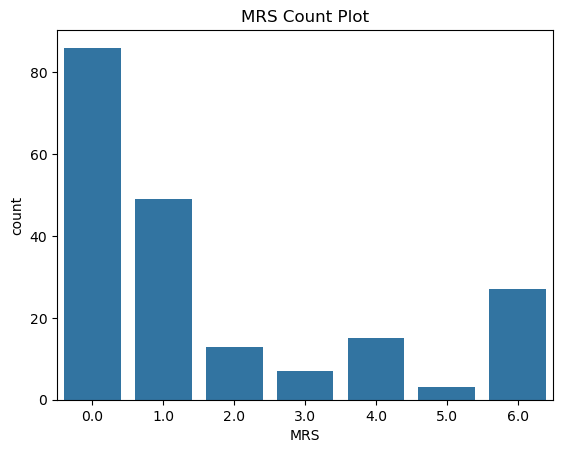

In [21]:
plt.figure()
plt.title('MRS Count Plot')
sns.countplot(data=data, x='MRS')
plt.show()

### Converting MRS to Good MRS and Bad MRS

In [22]:
# 1 = Good, 0 = Bad
data['MRS_Class'] = pd.Series()
for index, value in data['MRS'].items():
    if (value <= 2):
      data.loc[index,'MRS_Class'] = 1
    else:
      data.loc[index,'MRS_Class'] = 0

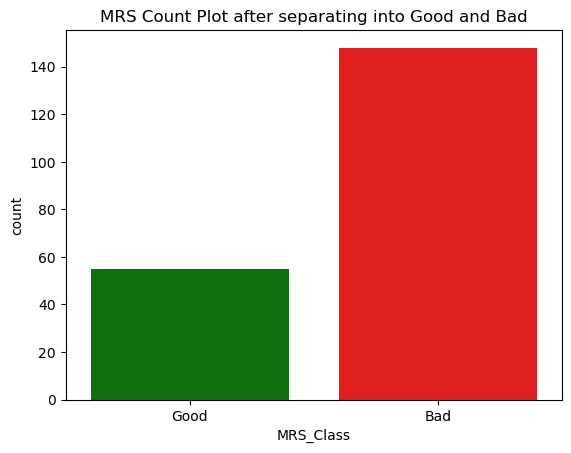

In [23]:
plt.figure()
plt.title('MRS Count Plot after separating into Good and Bad')

# Set the x variable to hue and use integer keys for the palette
sns.countplot(data=data, x='MRS_Class', hue='MRS_Class', palette={0: 'green', 1: 'red'}, legend=False)

# Set the custom x-tick labels
plt.xticks(ticks=[0, 1], labels=['Good', 'Bad'])

plt.show()

## Ajusting Columns

In [24]:
binary_columns = [col for col in data.columns if set(data[col].dropna().unique()) == {1, 2}]

for col in binary_columns:
    data.loc[data[col] == 2, col] = 0

In [25]:
data.reset_index(inplace=True, drop=True)

In [26]:
data.head()

Stroke volume  age  gender  NIHSS  SHT   DM  Alcohol  tobacco  smoking  \
0        22.6272   72       1   22.0  1.0  1.0      0.0      0.0      0.0   
1       131.5980   82       1   22.0  1.0  1.0      0.0      0.0      0.0   
2        73.4947   46       1    3.0  1.0  0.0      0.0      0.0      0.0   
3       194.1680   83       1    NaN  1.0  1.0      0.0      0.0      0.0   
4        53.8945   50       1   24.0  1.0  0.0      0.0      1.0      0.0   

   dyslipidaemia  ...  haemoglobin   PCV  Homocystiene    b 12  collaterals  \
0            0.0  ...         14.5  43.1         19.56   186.0          0.0   
1            0.0  ...         15.6  45.9          9.93  1335.0          0.0   
2            0.0  ...         14.2  43.9          9.00     NaN          0.0   
3            0.0  ...         11.8  42.0           NaN     NaN          0.0   
4            0.0  ...         13.5  41.0         33.42   156.0          0.0   

   mechanical thrombectomy  decompressive hemicranectomy  clot burden score  \
0                      1.0                           0.0                  3   
1                      0.0                           0.0                  3   
2                      0.0                           0.0                  7   
3                      0.0                           0.0                  7   
4                      0.0                           0.0                  1   

   MRS  MRS_Class  
0  1.0          1  
1  6.0          0  
2  0.0          1  
3  6.0          0  
4  4.0          0  

[5 rows x 23 columns]

In [27]:
data.to_csv('Cleaned_Data.csv', index=False)
data = pd.read_csv('Cleaned_Data.csv')

## Correlation Matrix

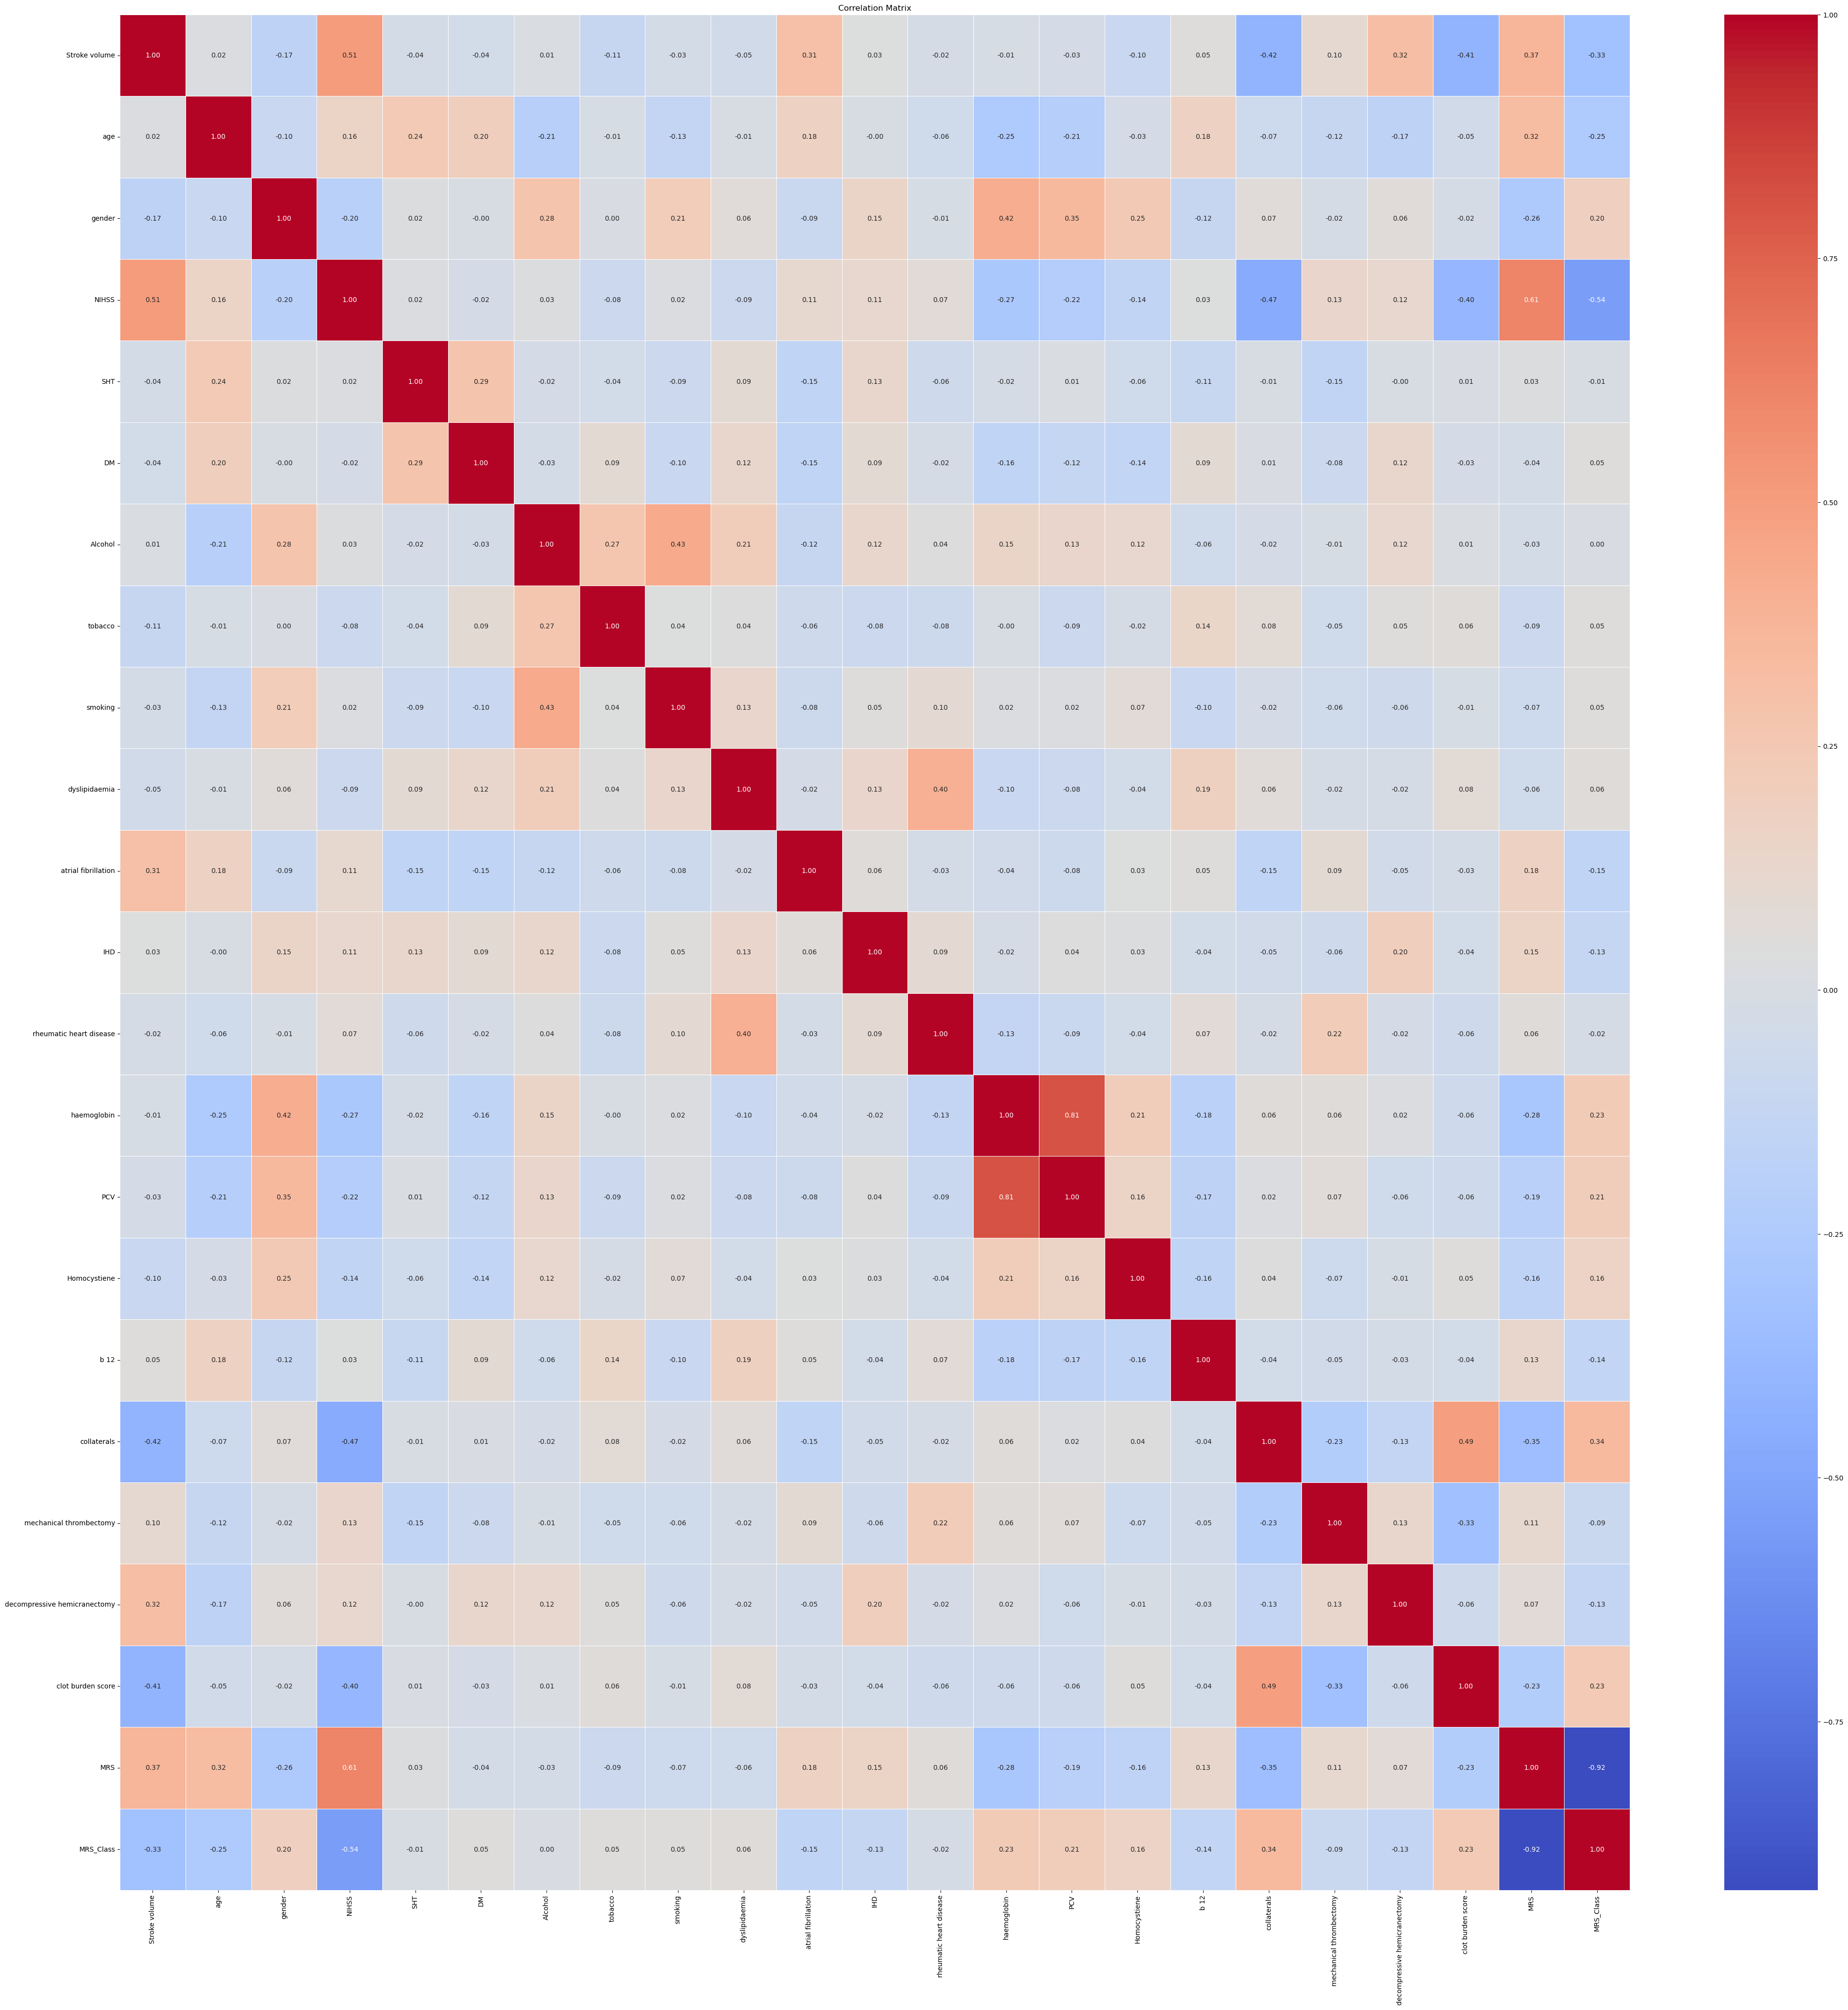

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Feature Extraction

In [29]:
y = data.iloc[:,-1].values
X = data.drop(columns=["MRS", "MRS_Class"])
X = X.to_numpy()

In [30]:
y

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0], dtype=int64)

In [31]:
X

array([[ 22.6272 ,  72.     ,   1.     , ...,   1.     ,   0.     ,
          3.     ],
       [131.598  ,  82.     ,   1.     , ...,   0.     ,   0.     ,
          3.     ],
       [ 73.4947 ,  46.     ,   1.     , ...,   0.     ,   0.     ,
          7.     ],
       ...,
       [ 14.3163 ,  50.     ,   1.     , ...,   0.     ,   0.     ,
         10.     ],
       [ 20.5737 ,  81.     ,   1.     , ...,   0.     ,   0.     ,
         10.     ],
       [  3.08024,  76.     ,   1.     , ...,   0.     ,   0.     ,
         10.     ]])

In [32]:
X.shape

(203, 21)

## Preprocessing Pipeline

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [34]:
data.isna().sum()

Stroke volume                    0
age                              0
gender                           0
NIHSS                           22
SHT                              3
DM                               4
Alcohol                          4
tobacco                          4
smoking                          4
dyslipidaemia                    4
atrial fibrillation              4
IHD                              4
rheumatic heart disease          4
haemoglobin                      9
PCV                             38
Homocystiene                    26
b 12                            37
collaterals                      2
mechanical thrombectomy          0
decompressive hemicranectomy     0
clot burden score                0
MRS                              3
MRS_Class                        0
dtype: int64

In [35]:
# Identify binary features
binary_features = [col for col in data.columns if set(data[col].dropna().unique()) == {0, 1}]
binary_features.remove('MRS_Class')

# Get indices of binary features in the DataFrame
binary_features_indices = [data.columns.get_loc(feature) for feature in binary_features]

# Create the binary transformer
binary_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ]
)

In [36]:
data.columns[binary_features_indices]

Index(['gender', 'SHT', 'DM', 'Alcohol', 'tobacco', 'smoking', 'dyslipidaemia',
       'atrial fibrillation', 'IHD', 'rheumatic heart disease', 'collaterals',
       'mechanical thrombectomy', 'decompressive hemicranectomy'],
      dtype='object')

In [37]:
# Identify numeric features by excluding the binary features from the DataFrame
numeric_features = [col for col in data.columns if col not in binary_features]
# Remove both 'MRS_Class' and 'MRS' in a single line
numeric_features = [feature for feature in numeric_features if feature not in ['MRS_Class', 'MRS']]

# Get indices of numeric features in the DataFrame
numeric_features_indices = [data.columns.get_loc(feature) for feature in numeric_features]

# Create the numeric transformer
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)

In [38]:
data.columns[numeric_features_indices]

Index(['Stroke volume', 'age', 'NIHSS', 'haemoglobin', 'PCV', 'Homocystiene',
       'b 12', 'clot burden score'],
      dtype='object')

In [39]:
# Create the column transformer for the entire preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features_indices),
        ("bin", binary_transformer, binary_features_indices),
    ]
)

In [40]:
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

# Prediction

## Importing Different Models

Top 7 Models:
1. LGMBClassifier
2. GradientBoostingClassifier
3. XGBoostClassifier
4. BaggingClassifier
5. AdaBoostClassifier
6. DecisionTreeClassifier
7. RandomForestClassifier


In [41]:
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
import warnings

## Model Pipeline

In [42]:
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessing_pipeline),
        ('classifier', DecisionTreeClassifier())
    ]
)

## Cross Validation Pipeline

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [44]:
# Define parameters for GridSearchCV
param_grid = [
    # Parameters for Decision Tree
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [5, 10, None],
        'classifier__criterion': ['gini', 'entropy']
    },
    # Parameters for Random Forest
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 20, 30],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__bootstrap': [True]
    },
    # Parameters for AdaBoost
    {
        'classifier': [AdaBoostClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.01],
        'classifier__estimator': [DecisionTreeClassifier(max_depth=3)]
    },
    # Parameters for Gradient Boosting
    {
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.01],
        'classifier__max_depth': [3, 5]
    },
    # Parameters for XGBoost
    {
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.1, 0.01]
    },
    # Parameters for LGBM
    {
        'classifier': [LGBMClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 10],
        'classifier__learning_rate': [0.1, 0.01],
        'classifier__num_leaves': [7, 15, 31]
    },
    # Parameters for Bagging Classifier
    {
        'classifier': [BaggingClassifier()],
        'classifier__n_estimators': [50, 100],
        'classifier__estimator': [DecisionTreeClassifier(max_depth=5)]
    }
]

## Grid Search Cross Validation

In [45]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [46]:
# grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy'], refit=False, verbose=2)
# grid.fit(X, y)

In [47]:
grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy'], refit='f1', verbose=2)
grid.fit(X, y)

Fitting 10 folds for each of 110 candidates, totalling 1100 fits
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time

c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.3s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier()

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('scaler',
                                                                                                           MinMaxScaler())]),
                                                                                          [0,
                                                                                           1,
                                                                                           3,
                                                                                           13,
                                                                                           14,
                                                                                           15,
                                                                                           16,
                                                                                           20]),
                                                                                         ('bin',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='mo...
                          'classifier__learning_rate': [0.1, 0.01],
                          'classifier__max_depth': [3, 5, 10],
                          'classifier__n_estimators': [50, 100, 200],
                          'classifier__num_leaves': [7, 15, 31]},
                         {'classifier': [BaggingClassifier()],
                          'classifier__estimator': [DecisionTreeClassifier(max_depth=5)],
                          'classifier__n_estimators': [50, 100]}],
             refit='f1',
             scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard',
                      'balanced_accuracy'],
             verbose=2)

# Saving Model

In [48]:
import joblib

# Save the entire GridSearchCV object
grid_filename = 'GSCV_NOFS_CBS_Col.pkl'
joblib.dump(grid, grid_filename)

print(f"Complete GridSearchCV model saved as '{grid_filename}'")

Complete GridSearchCV model saved as 'GSCV_NOFS_CBS_Col.pkl'


In [49]:
print(grid.best_params_)

{'classifier': RandomForestClassifier(), 'classifier__bootstrap': True, 'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__n_estimators': 100}


In [50]:
print(grid.best_score_)

0.8689547316482802


In [51]:
from datetime import datetime

# List of scoring metrics used in GridSearchCV
scoring_metrics = ['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy']

# Extracting the parameter settings for each run and combining them into one column
params_summary = grid.cv_results_['params']
combined_params = [str(param_set) for param_set in params_summary]

# Creating an initial DataFrame with combined parameters
df = pd.DataFrame({'Parameters': combined_params})

# Adding mean scores for each scoring metric to the DataFrame
for metric in scoring_metrics:
    mean_score_key = f'mean_test_{metric}'
    
    if mean_score_key in grid.cv_results_:
        # Extract the mean scores and add to the DataFrame
        df[f'Mean {metric.capitalize()} Score'] = np.round_(grid.cv_results_[mean_score_key], 6)
    else:
        print(f"Metric '{metric}' not found in cv_results_")

# Sorting by F1 Score as it was the refit metric
df = df.sort_values(by='Mean F1 Score', ascending=False)

# Saving the DataFrame to an Excel file
current_datetime = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
result_filename = 'MRS Prediction Results CBS and Collaterals with NO FS--' + current_datetime + '.xlsx'
df.to_excel(result_filename, index=False)

print(f"Results saved to {result_filename}")


Results saved to MRS Prediction Results CBS and Collaterals with NO FS--04-03-2025-02-59-34.xlsx


# Confusion Matrix + Model Evaluation

## Load Libraries

In [52]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, 
    f1_score, recall_score, roc_auc_score, jaccard_score, 
    balanced_accuracy_score, precision_score
)
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold

## Load Best GSCV Model

In [53]:
# Load the saved GridSearchCV object
grid_filename = 'GSCV_NOFS_CBS_Col.pkl'
grid = joblib.load(grid_filename)

# Extract the best model from the loaded GridSearchCV object
best_model = grid.best_estimator_

print("Best Model Loaded Successfully!")

Best Model Loaded Successfully!


## Load and Preprocess the Data

In [54]:
# Load your cleaned data
data = pd.read_csv('Cleaned_Data.csv')

# Separate features and target variable
y = data.iloc[:, -1].values
X = data.drop(columns=["MRS", "MRS_Class"]).to_numpy()

# # Handle missing values by imputing them
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)

## Perform K-Fold CV

In [55]:
# Perform K-Fold cross-validation with 10 splits
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Use cross_val_predict to get cross-validated predictions
y_pred = cross_val_predict(best_model, X, y, cv=kf)

print("Cross-Validation Completed!")

Cross-Validation Completed!


## Confusion Matrix

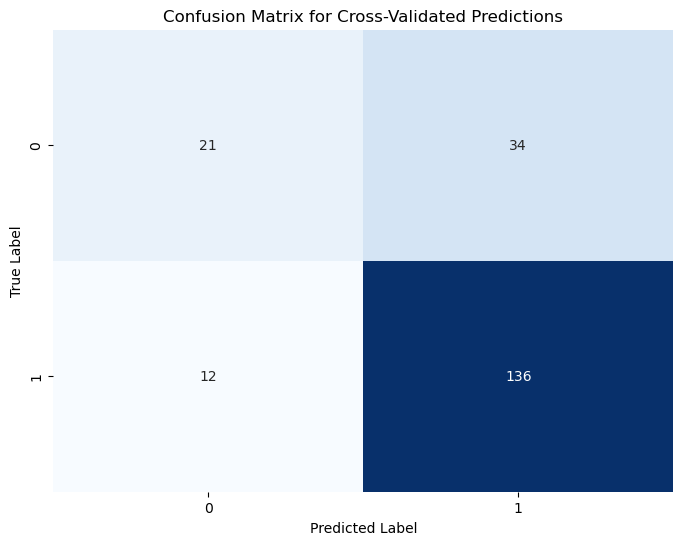

Confusion Matrix Generated and Saved!


In [56]:
# Generate confusion matrix for cross-validated predictions
conf_matrix = confusion_matrix(y, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Cross-Validated Predictions')

# Save the plot
plt.savefig('Confusion_Matrix_Best_Performing_GSCV_NOFS_MRS_PRED_CBS_COLLATERAL.png', dpi=300)
plt.show()

print("Confusion Matrix Generated and Saved!")

## Classification Report

In [57]:
# Generate and print a detailed classification report for cross-validated predictions
classification_rep = classification_report(y, y_pred)
print("\nClassification Report for Cross-Validated Predictions:\n", classification_rep)


Classification Report for Cross-Validated Predictions:
               precision    recall  f1-score   support

           0       0.64      0.38      0.48        55
           1       0.80      0.92      0.86       148

    accuracy                           0.77       203
   macro avg       0.72      0.65      0.67       203
weighted avg       0.76      0.77      0.75       203



## CV Scores

In [58]:
# Perform cross-validation on the best model to assess overfitting
# Cross-validate using 10 folds and the 'f1' scoring metric
cross_val_scores = cross_val_score(best_model, X, y, cv=kf, scoring='f1')

# Print scores
print("\nCross-Validation F1 Scores:", cross_val_scores)
print("Mean F1 Score from Cross-Validation:", np.mean(cross_val_scores))


Cross-Validation F1 Scores: [0.875      0.91428571 0.90322581 0.93333333 0.66666667 0.94444444
 0.82758621 0.83870968 0.94117647 0.83870968]
Mean F1 Score from Cross-Validation: 0.8683137997505268


## Extract Best Performing Models

In [59]:
# Extract GridSearchCV results into DataFrame
df_results = pd.DataFrame(grid.cv_results_)
df_results = df_results.sort_values(by='mean_test_f1', ascending=False)

# Get unique top-performing model instances
unique_models = df_results['param_classifier'].unique()
top_models = []

for model in unique_models:
    top_model = df_results[df_results['param_classifier'] == model].head(1)
    top_models.append(top_model)

# Concatenate all top-performing unique models
top_models_df = pd.concat(top_models)

print("Top-Performing Models Extracted!")

Top-Performing Models Extracted!


## Metrics of Top Performing Models

In [60]:
# Initialize a list to store metrics for each unique top model
metrics_list = []

# Evaluate metrics for the top-performing unique models using cross-validation
for index, row in top_models_df.iterrows():
    model_params = row['params']
    
    # Set the model with the corresponding parameters
    model = model_params['classifier']
    model.set_params(**{
        key.replace('classifier__', ''): value 
        for key, value in model_params.items() 
        if key.startswith('classifier__')
    })
    
    # Perform cross-validation and predict
    y_pred = cross_val_predict(model, X, y, cv=kf)
    
    # Calculate metrics
    metrics = {
        'Model': type(model).__name__,
        'Accuracy': accuracy_score(y, y_pred),
        'F1 Score': f1_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'ROC AUC': roc_auc_score(y, y_pred),
        'Jaccard': jaccard_score(y, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y, y_pred)
    }
    metrics_list.append(metrics)

print("Performance Metrics Computed!")

c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

[LightGBM] [Info] Number of positive: 132, number of negative: 50
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 182, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.725275 -> initscore=0.970779
[LightGBM] [Info] Start training from score 0.970779
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

## Save Metrics

In [61]:
# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Save metrics to an Excel file
metrics_filename = 'Top_Unique_Models_Metrics_MRS_PRED_CBS_COLL_NOFS.xlsx'
metrics_df.to_excel(metrics_filename, index=False)

print(f"Metrics saved to '{metrics_filename}'!")

Metrics saved to 'Top_Unique_Models_Metrics_MRS_PRED_CBS_COLL_NOFS.xlsx'!
